# First Experiment

Creating an experiment in ``Coba`` requires two choices:

1. Which environment(s) do we want to use?
2. Which learner(s) do we want to evaluate?

``Coba`` provides many learners and environments out-of-the-box, making it easy to create different kinds of experiments quickly. 

To choose which environment and learner we want to use we need to consider the problem/question we would like to answer.

For example, let's assume we are interested in solving bandit problems. For our bandit problem we would like to compare two exploration strategies, epsilon-greedy and upper-confidence-bounding. We also believe that our environment has moderate noise. With all this in mind we might start a study of this kind of problem running the following experiment.

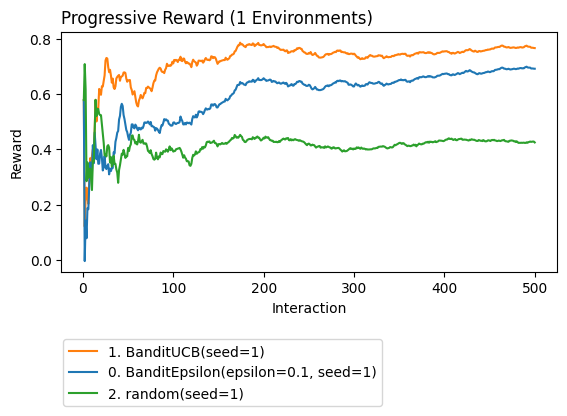

In [1]:
import coba as cb

env = cb.Environments.from_bandit_synthetic(n_interactions=500,n_actions=5).noise(reward=(0,.75))
lrn = [cb.BanditEpsilonLearner(.1), cb.BanditUCBLearner(), cb.RandomLearner() ]
exp = cb.Experiment(env,lrn)

exp.run(quiet=True,processes=10).plot_learners()

This is a great start. We can note two things:
1. upper-confidence-bounding appears to out-perform epsilon-greedy
2. both exploration methods do considerably better than randomly selecting actions

As a next step we might be curious about how robust these results are. That is, we may wonder:
+ On average by how much does UCB beat epsilon greedy?
+ How often does UCB beat epsilon-greedy?

To answer the first question we can repeat our initial experiment with more replications.


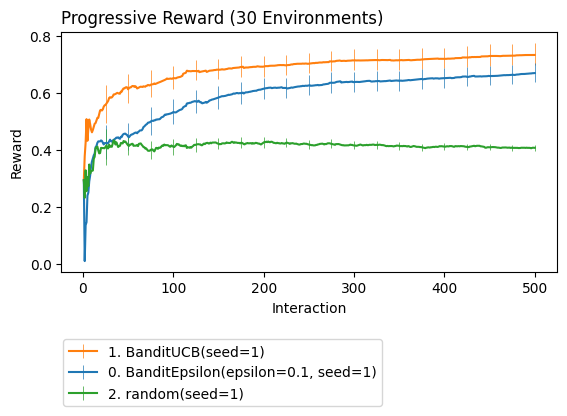

In [6]:
import coba as cb

env = cb.Environments.from_bandit_synthetic(n_interactions=500,n_actions=5).noise(reward=(0,.75),seed=range(30))
lrn = [cb.BanditEpsilonLearner(.1), cb.BanditUCBLearner(), cb.RandomLearner() ]
exp = cb.Experiment(env,lrn)

exp.run(quiet=True,processes=10).plot_learners(err='bs')

In the plot above we have just replicated our original experiment 30 times with different noise values added to the rewards in each replication. We then plotted the 95% bootstrap confidence interval for the average performance over all 30 noise replicants. BanditUCB seems to outperform BanditEpsilon by a little less than .1 reward at interaction 500. To see the average reward difference more clearly we can create a contrast plot (which will show the difference of average reward between the two exploration strategies).

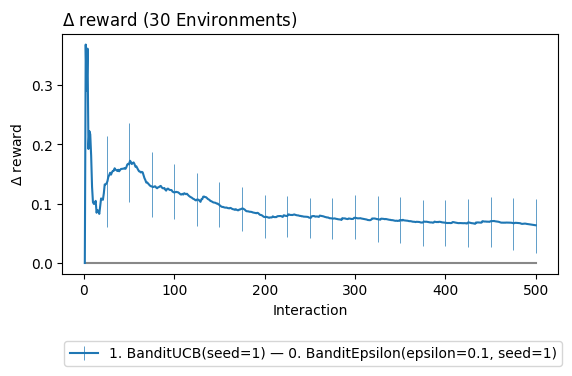

In [1]:
import coba as cb

env = cb.Environments.from_bandit_synthetic(n_interactions=500,n_actions=5).noise(reward=(0,.75),seed=range(30))
lrn = [cb.BanditEpsilonLearner(.1), cb.BanditUCBLearner(), cb.RandomLearner()]
exp = cb.Experiment(env,lrn)

exp.run(quiet=True,processes=10).plot_contrast(0,1, x='index', err='bs')

To answer the second question we can do a contrast plot in probability mode.

This will show us our estimated probability that upper-confidence-bound beats epsilon-greedy. 

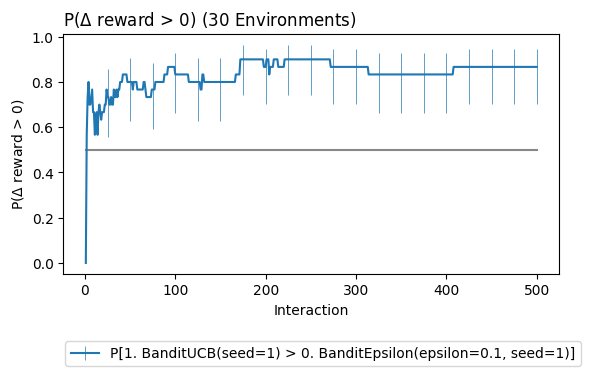

In [1]:
import coba as cb

env = cb.Environments.from_bandit_synthetic(n_interactions=500,n_actions=5).noise(reward=(0,.75),seed=range(30))
lrn = [cb.BanditEpsilonLearner(.1), cb.BanditUCBLearner(), cb.RandomLearner()]
exp = cb.Experiment(env,lrn)

exp.run(quiet=True,processes=10).plot_contrast(0,1, x='index', mode='prob', err='bi')

This view lets us see that UCB didn't win in all replications. At best it won about in about 90% of the 30 replications.

## Selecting Learners
Next an experiment needs some learners to evaluate. Coba comes with a number of existing learners. We're going to pick three:
1. **RandomLearner**: This learner randomly selects actions. It is useful as a comparison to make sure learners are actually "learning".
2. **EpsilonBanditLearner**: This learner follows an epsilon greedy policy and calculates the mean reward for each action.
3. **VowpalEpsilonLearner**: This learner follows an epsilon greedy policy and uses a linear regressor to predict expected reward.

## Running the Experiment
Using the selected environments and learners we can create and run an Experiment. 

Coba Experiments take care of all the work of actually evaluating our learners against our environments and creating Results. 

Creating and running our experiment looks like this:

In [4]:
import coba as cb

env = cb.Environments.from_linear_synthetic(2000,seed=2).binary()
lrn = [cb.VowpalEpsilonLearner(),cb.EpsilonBanditLearner(),cb.RandomLearner()]
res = cb.Experiment(env,lrn).run()

2024-01-28 18:27:51 -- Experiment Started
2024-01-28 18:27:51 -- Recording Learner 0 parameters... (0.0 seconds) (completed)
2024-01-28 18:27:51 -- Recording Evaluator 0 parameters... (0.0 seconds) (completed)
2024-01-28 18:27:51 -- Recording Learner 1 parameters... (0.0 seconds) (completed)
2024-01-28 18:27:51 -- Recording Learner 2 parameters... (0.0 seconds) (completed)
2024-01-28 18:27:51 -- Peeking at Environment 0... (0.0 seconds) (completed)
2024-01-28 18:27:51 -- Recording Environment 0 parameters... (0.0 seconds) (completed)
2024-01-28 18:27:51 -- Evaluating Learner 0 on Environment 0... (0.77 seconds) (completed)
2024-01-28 18:27:52 -- Evaluating Learner 1 on Environment 0... (0.42 seconds) (completed)
2024-01-28 18:27:52 -- Evaluating Learner 2 on Environment 0... (0.35 seconds) (completed)
2024-01-28 18:27:52 -- Experiment Finished


-------------
And just like that we've run our first experiment in Coba. We can now create a summary plot using our results to see what happened.

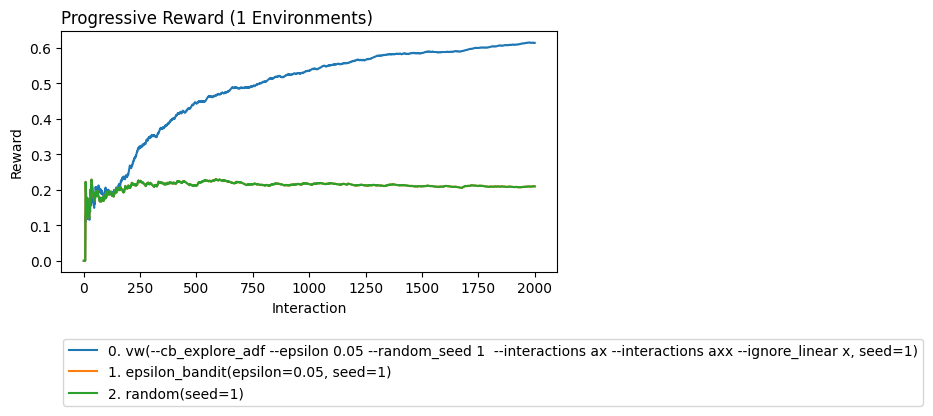

In [5]:
res.plot_learners()

Taking a quick moment to explain the plot, the x-axis indicates how many times our learners have interacted with the environment. The y-axis indicates the average reward received since the beginning of the Experiment. And the legend below the plot shows each learner and their hyperparameters.

Of course, running a single experiment often leads to more questions. Where is the **EpsilonBanditLearner**? In this case it is immediately beneath **RandomLearner**. There are a few reasons for why this happened so let's see if we can't figure this out by running a second experiment.

## Second Experiment
As we mentioned above bandit learners don't consider context or action features when choosing actions. For our second experiment then we're going to modify the **LinearSyntheticSimulation** to see what parameters are causing this strange behavior. Look at the new code and notice the new parameter `n_action_features=0`.

2024-01-28 18:12:45 -- Experiment Started
2024-01-28 18:12:45 -- Recording Learner 0 parameters... (0.0 seconds) (completed)
2024-01-28 18:12:45 -- Recording Evaluator 0 parameters... (0.0 seconds) (completed)
2024-01-28 18:12:45 -- Recording Learner 1 parameters... (0.0 seconds) (completed)
2024-01-28 18:12:45 -- Recording Learner 2 parameters... (0.0 seconds) (completed)
2024-01-28 18:12:45 -- Peeking at Environment 0... (0.0 seconds) (completed)
2024-01-28 18:12:45 -- Recording Environment 0 parameters... (0.0 seconds) (completed)
2024-01-28 18:12:45 -- Evaluating Learner 0 on Environment 0... (0.43 seconds) (completed)
2024-01-28 18:12:45 -- Evaluating Learner 1 on Environment 0... (0.13 seconds) (completed)
2024-01-28 18:12:45 -- Evaluating Learner 2 on Environment 0... (0.08 seconds) (completed)
2024-01-28 18:12:45 -- Experiment Finished


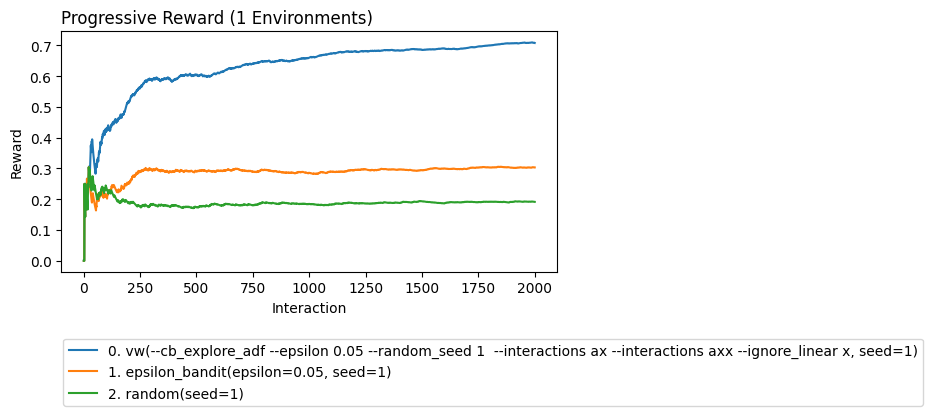

In [5]:
import coba as cb

environments = cb.Environments.from_linear_synthetic(2000,n_action_features=0,seed=2).binary()
learners     = [ cb.VowpalEpsilonLearner(), cb.EpsilonBanditLearner(), cb.RandomLearner()]

cb.Experiment(environments, learners).run().plot_learners()

Look at that! **EpsilonBanditLearner** and **RandomLearner** are no longer identical. So what happened? 

When we set `n_action_features=0` this changed the **LinearSyntheticSimulation** so that its actions no longer had "features". To understand what this means it helps to consider an example where we want to recommended a movie. Our actions in this case would be movies and each movie may have certain features that helps us decide what to recommend like its genre or critic rating. When our actions don't have features the environment is more like recommending an activity such as reading, watching a movie or going for a walk than a movie. That is, each action is distinguishable without needing features to describe it. Why do you think this changed the performance of **EpsilonBanditLearner**?

Ok, time for one final experiment. Let's see if we can get **EpsilonBanditLearner** performing competitively.

## Final Experiment
For this final experiment we're going to make several changes to the **LinearSyntheticSimulation**.

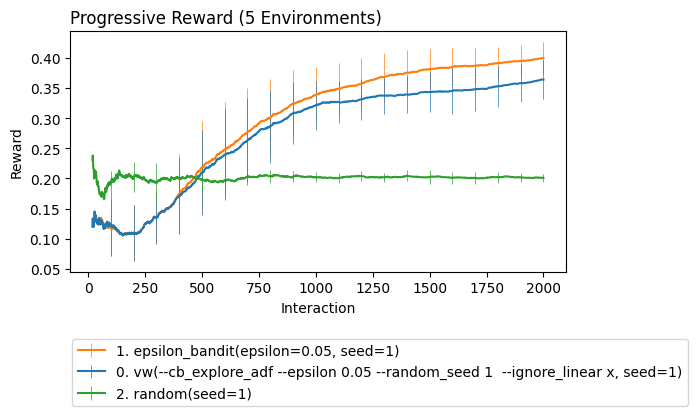

In [1]:
import coba as cb

base_environment = cb.Environments.from_linear_synthetic(2000, n_context_features=0, n_action_features=0)

environments = base_environment.noise(reward=lambda rwd,rng:rwd+rng.gauss(0,.5)).binary().shuffle([1,2,3,4,5])
learners     = [cb.VowpalEpsilonLearner(features=[1,'a']), cb.EpsilonBanditLearner(), cb.RandomLearner() ]

result = cb.Experiment(environments, learners).run(quiet=True)
result.plot_learners(err='se',xlim=(20,2000))

Wow, there was a lot more output that time. We'll come back to that in a second but first, look at that plot. Our underdog, **EpsilonBanditLearner** is finally hanging with the big boys. With context_features and action_features turned off we're now evaluating against a multi-armed bandit simulation. This is actually what bandit algorithms are designed for and sure enough we can see **EpsilonBanditLearner** performs well in this simulation. 

What are those new lines, though, on the plot? Those weren't there before. Those are there because we specified `shuffle`. In fact, the reason there was so much more output with this experiment is because of `shuffle`. Applying shuffle to **Environments**  makes `n` environments (where `n` is the length of the `shuffle` list). This means there is also `n` times more output to log as we process each environment.

In [4]:
environments

1. LinearSynth(A=5,c=0,a=0,R=['a', 'xa'],seed=1),{'reward_noise': True, 'noise_seed': 1},{'binary': True},{'shuffle': 1}
2. LinearSynth(A=5,c=0,a=0,R=['a', 'xa'],seed=1),{'reward_noise': True, 'noise_seed': 1},{'binary': True},{'shuffle': 2}
3. LinearSynth(A=5,c=0,a=0,R=['a', 'xa'],seed=1),{'reward_noise': True, 'noise_seed': 1},{'binary': True},{'shuffle': 3}
4. LinearSynth(A=5,c=0,a=0,R=['a', 'xa'],seed=1),{'reward_noise': True, 'noise_seed': 1},{'binary': True},{'shuffle': 4}
5. LinearSynth(A=5,c=0,a=0,R=['a', 'xa'],seed=1),{'reward_noise': True, 'noise_seed': 1},{'binary': True},{'shuffle': 5}


## Conclusion
We hope this brief introduction has gotten you excited about the possibilities of COBA. What would you like to do first with Coba? Do you have an algorithm that you're hoping to publish and would like to easily test against other learners? Do you have a data set that you'd like to build a simulation from to see which contextual bandit algorithm performs best on it? Or are you just trying to learn more about machine learning and are just looking for an easy way to test introductory algorithms while you learn? All the above are easy to do with Coba. 

We also welcome code contributions for new features. Feel free to reach out to mr2an@virginia.edu for ideas about features that Coba could benefit from. Coba is able to do a lot more than what we've shown here. It has its own environment syntax to allow you to define environments in a separate file for easy sharing. It is also able to import environments from a number of data formats. It is able to manage resource constraints to maximize through put of long running environments. And it can download remote data sets. All of this functionality has grown out of our own experimental needs and so we hope most of what we've built will be useful to others.